# Dynamic Time Warping

In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import seaborn as sns
import scipy as spy
import scipy
import tslearn.metrics as ts

Similarity measure using DTW can be estimated between signals of arbitartly sizes. 

### DTW measure between two signals can be estimated as follows:
####  Step 1. Estimate the euclidian distance between the signals to create a distance matrix $ D $
$$ D[i,j] = |signal1[i] - signal2[j]|$$

This holds for 1D singal, but can be extended to the multi-dimentional arrays

<IPython.core.display.Javascript object>


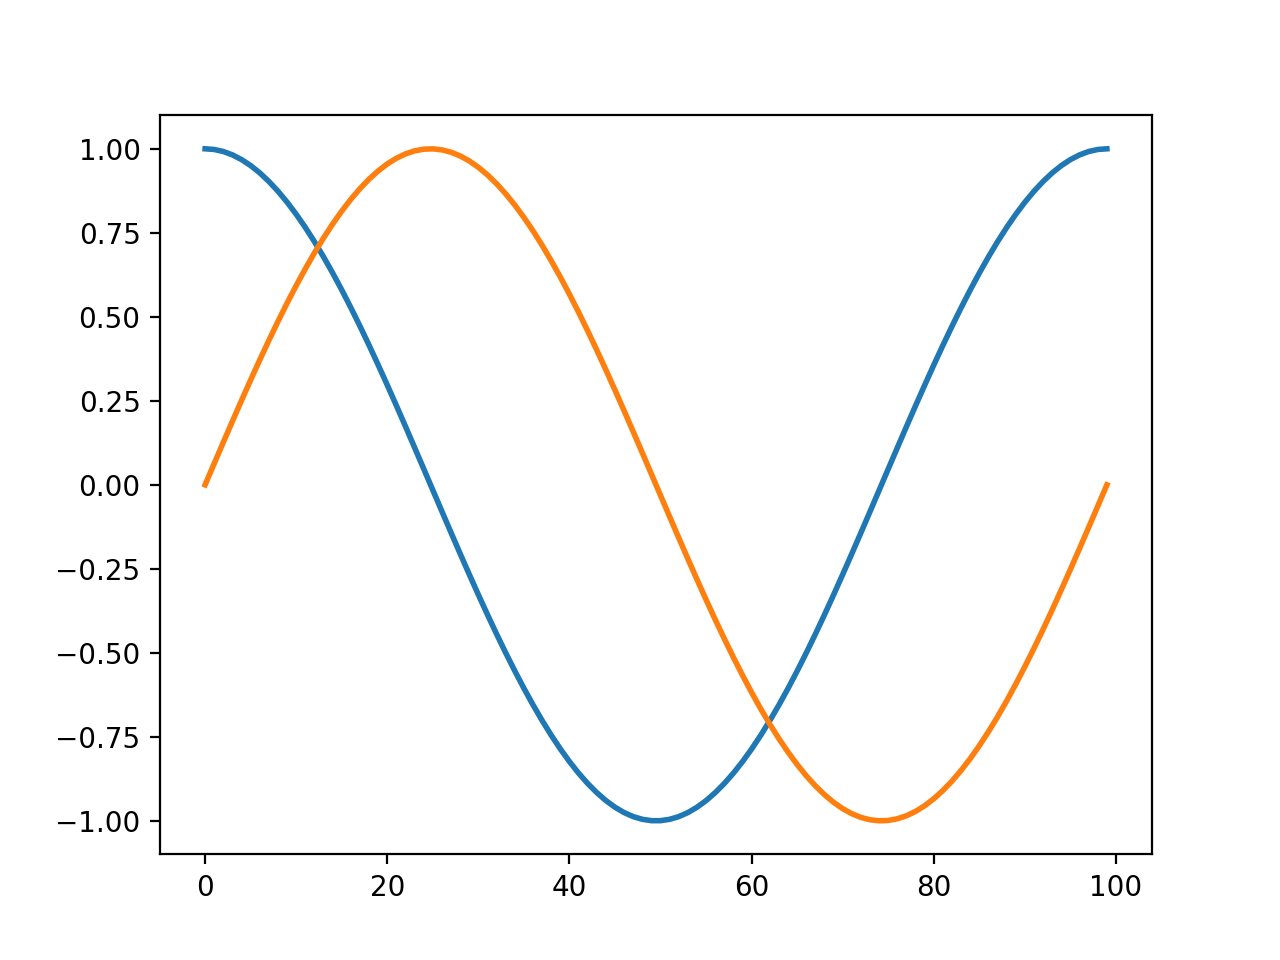

In [138]:
# let us create two random signals
signal1 = np.cos(np.linspace(0, 2, 100) * np.pi)
signal2 = np.sin(np.linspace(0, 2, 100) * np.pi)
plt.plot(signal1, linewidth=2.0)
plt.plot(signal2, linewidth=2.0)

In [139]:
mat = scipy.spatial.distance.cdist(signal1.reshape(100,1),
                                   signal2.reshape(100,1),
                                   metric="euclidean")

<IPython.core.display.Javascript object>


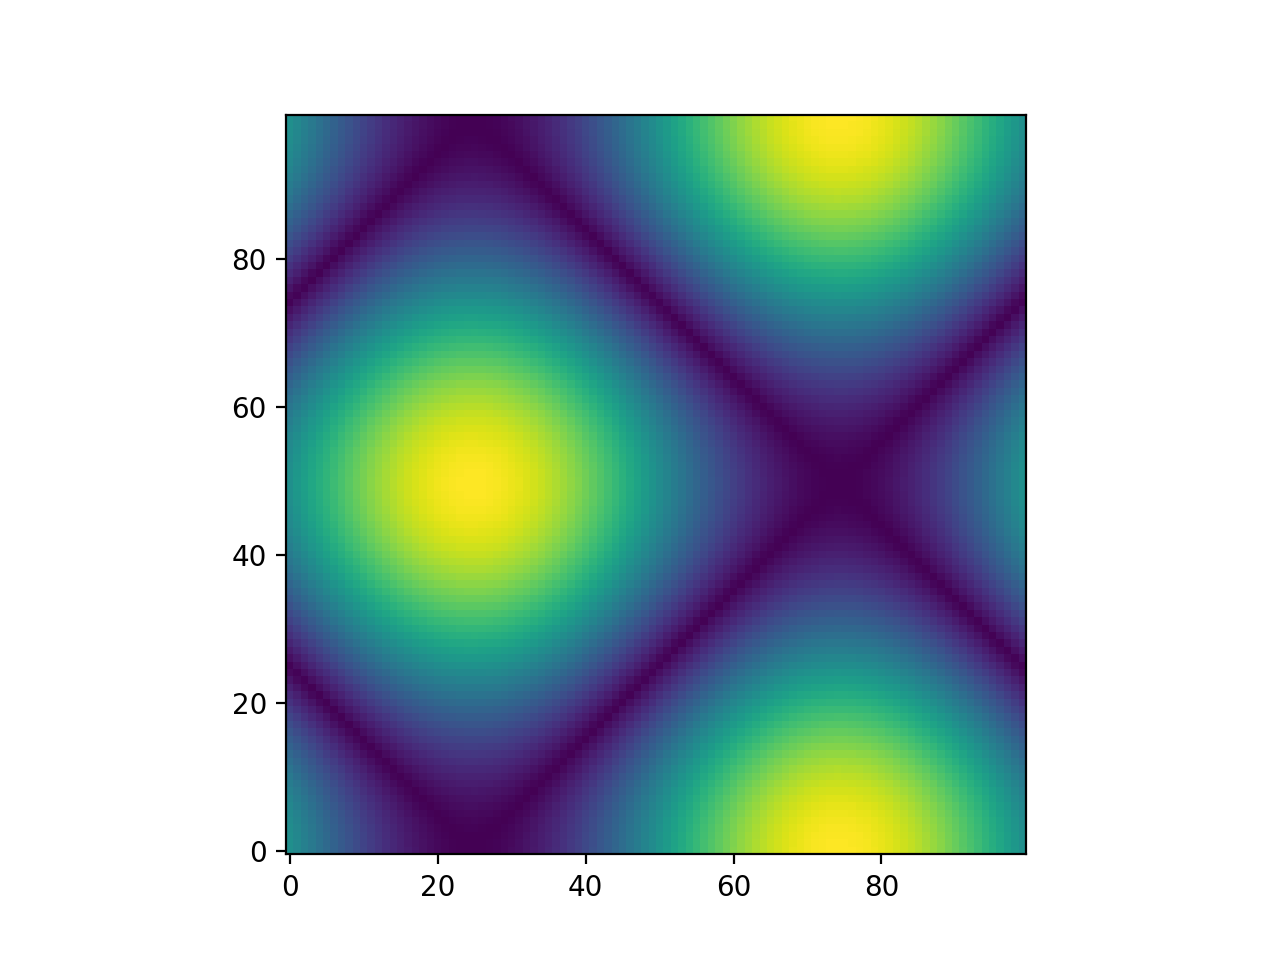

In [140]:
plt.imshow(mat, origin="lower")

#### Step 2:  Find the accumilated cost matrix. 
This is done based on dynamic programming to reduce the time of finding the paths. 

In [141]:
acc_cost = np.zeros((mat.shape[0]+1, mat.shape[1]+1))

acc_cost[0,0:] = np.inf
acc_cost[0:,0] = np.inf
acc_cost[0,0] = 0.0

for i in range(1, acc_cost.shape[0]):
    for j in range(1, acc_cost.shape[1]):
          acc_cost[i,j] = mat[i-1, j-1] + min(acc_cost[i-1, j-1], acc_cost[i, j-1], acc_cost[i-1,j])
acc_cost = acc_cost[1:,1:]

<IPython.core.display.Javascript object>


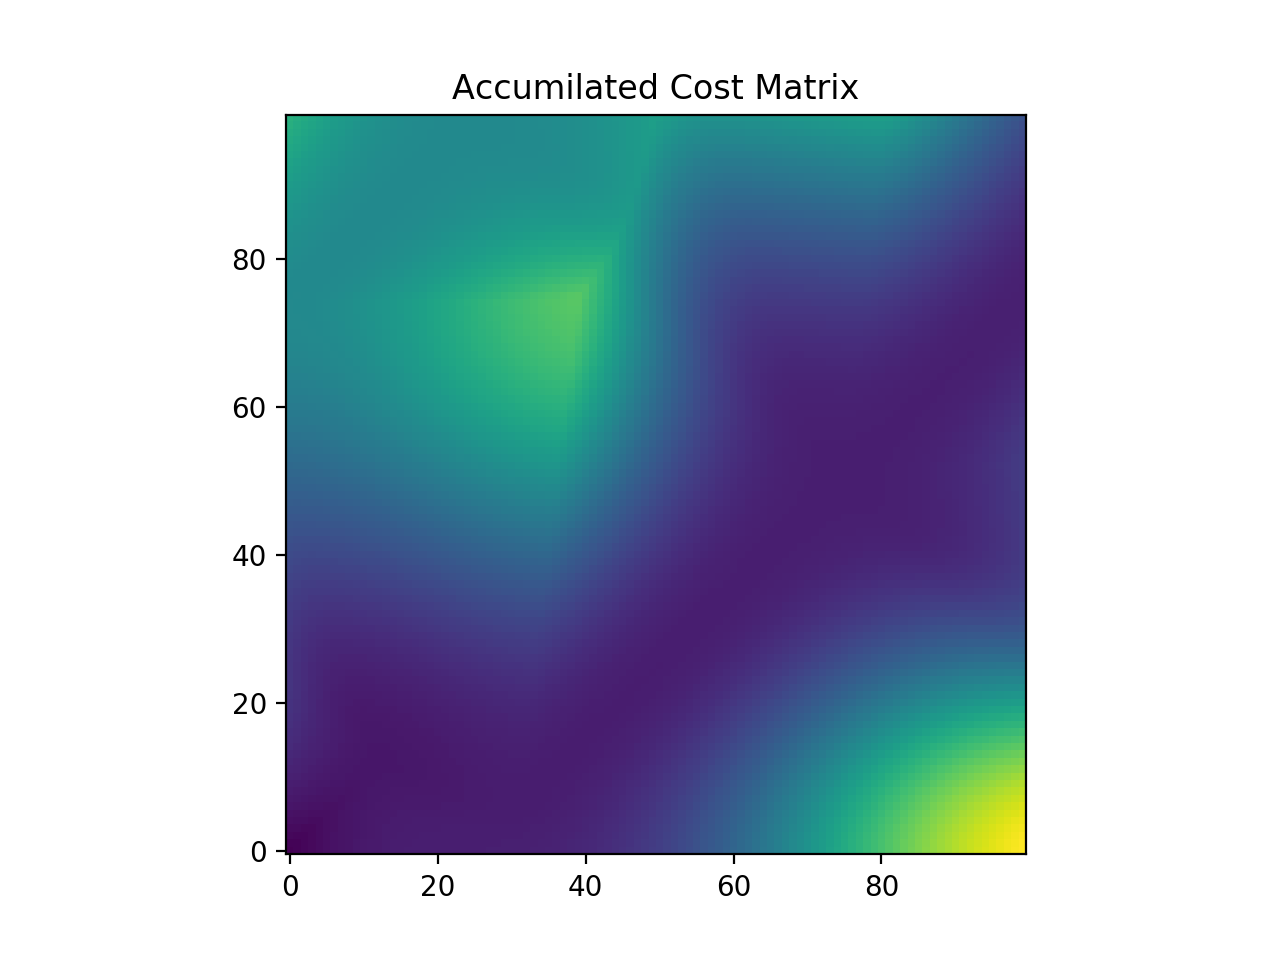

Text(0.5, 1.0, 'Accumilated Cost Matrix')

In [142]:
plt.imshow(acc_cost, origin="lower")
plt.title("Accumilated Cost Matrix")

## Step 3: Estimate the path based on the acc matrix

In [152]:
path = [[acc_cost.shape[0]-1, acc_cost.shape[1]-1]]
i = acc_cost.shape[0]-1
j = acc_cost.shape[1]-1
while not(i == 0 and j == 0):
    if i == 1:
        path.append([0, j-1])
    elif j == 1:
        path.append([i-1, 0])
    else:
        index = [[i-1, j-1], [i-1, j], [i, j-1]]
        min_ind = np.argmin([acc_cost[i-1, j-1], acc_cost[i-1, j], acc_cost[i, j-1]])
        path.append(index[min_ind])
    i = path[-1][0]
    j = path[-1][1]

pathsx = [i[0] for i in path]
pathsy = [i[1] for i in path]

<IPython.core.display.Javascript object>


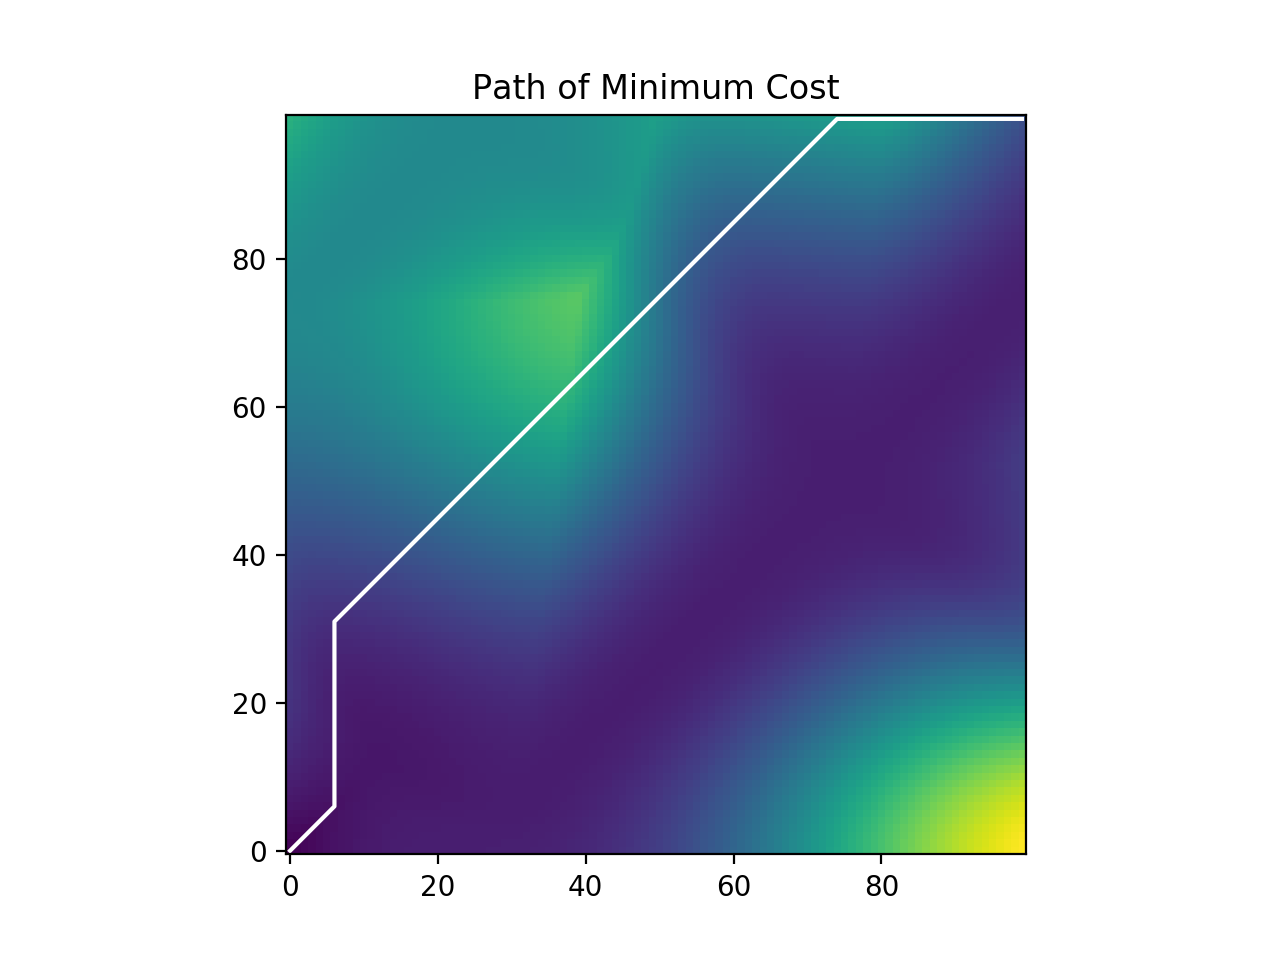

Text(0.5, 1.0, 'Path of Minimum Cost')

In [153]:
plt.plot(pathsx, pathsy, "w")
plt.imshow(acc_cost, origin="lower")
plt.title("Path of Minimum Cost")

## DTW Cost
$$ dtw\ metric = \sum^p_{i,j \in p} c(i,j) $$

In [171]:
dtw_metric = 0.0
for i in path1[0]:
    dtw_metric += acc_cost[i[0], i[1]]
print(np.sqrt(dtw_metric/100))
dtw_metric = 0.0
for i in path:
    dtw_metric += acc_cost[i[0], i[1]]
print(np.sqrt(dtw_metric/100))

3.532955071268999
3.541527245223522


#### Verify based on the tslearn

In [161]:
path1 = ts.dtw_path(signal1, signal2)
path1x = [i[0] for i in path1[0]]
path1y = [i[1] for i in path1[0]]

<IPython.core.display.Javascript object>


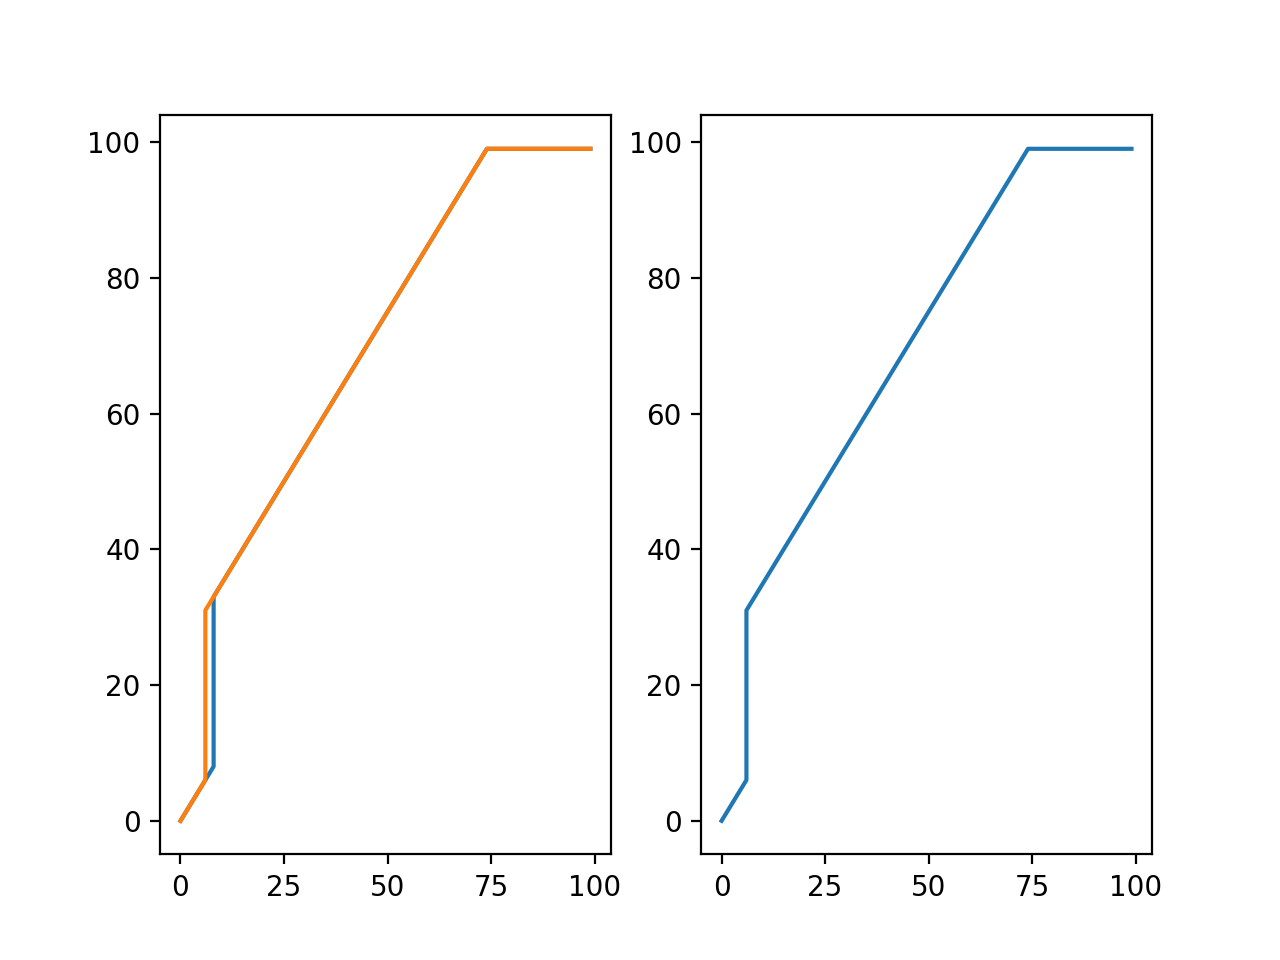

In [172]:
plt.subplot(1,2,1)
plt.plot(path1x, path1y)
plt.plot(pathsx, pathsy)
plt.subplot(1,2,2)
plt.plot(pathsx, pathsy)

In [168]:
path1[1]

4.264389049701766